**Notas para contenedor de docker:**

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

```
docker run --gpus all --rm -v <ruta a mi directorio>:/datos --name jupyterlab_nvidia_r_gputools_container -p 8888:8888 -d palmoreck/jupyterlab_nvidia_r_gputools:1.1.0_10.2
```

password para jupyterlab: `qwerty`

Detener el contenedor de docker:

```
docker stop jupyterlab_nvidia_r_gputools_container
```

Documentación de la imagen de docker `palmoreck/jupyterlab_nvidia_r_gputools:1.1.0_10.2` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/nvidia/r_gputools).

---

# gputools

Extraído de: [gputools: A Few GPU Enabled Functions](https://rdrr.io/cran/gputools/): Provides R interfaces to a handful of common functions implemented using the Nvidia CUDA toolkit. Some of the functions require at least GPU Compute Capability 1.3 ... 

Github: [nullsatz](https://github.com/nullsatz/gputools)

Siguientes ejemplos extraídos de la documentación de `gputools`: [man pages](https://rdrr.io/cran/gputools/man/).

In [1]:
library(gputools)

In [7]:
chooseGpu(deviceId = 0) 

[[1]]
[1] 0

In [8]:
getGpuId()

[1] 0

# gpuCor

Calculate Various Correlation Coefficients With a GPU

In [9]:
example(gpuCor)


gpuCor> numAvars <- 5

gpuCor> numBvars <- 10

gpuCor> numSamples <- 30

gpuCor> A <- matrix(runif(numAvars*numSamples), numSamples, numAvars)

gpuCor> B <- matrix(runif(numBvars*numSamples), numSamples, numBvars)

gpuCor> gpuCor(A, B, method="pearson")
$coefficients
            [,1]        [,2]        [,3]        [,4]        [,5]        [,6]
[1,] -0.03063259 -0.09137478 -0.05603712 -0.11906162  0.02860697  0.11559368
[2,]  0.10791988 -0.13445774  0.11277220  0.32934076 -0.13805358 -0.07824692
[3,]  0.11097453  0.11141005 -0.02591392 -0.02068852 -0.11666829  0.21650627
[4,]  0.10591734 -0.25529552 -0.05637340 -0.34416306 -0.04327332 -0.21589936
[5,] -0.05403328  0.12884060 -0.30462712  0.02678285 -0.29858655 -0.15600798
            [,7]        [,8]       [,9]        [,10]
[1,] -0.41899770 -0.47202978 -0.1583256  0.371268451
[2,] -0.22833797 -0.21221812 -0.3074636  0.101287216
[3,]  0.31207591  0.13607119 -0.1993146  0.002395211
[4,] -0.01902035 -0.06611571 -0.1534732  0.178319931
[5,]

# gpuLm

Fitting Linear Models using a GPU-enabled QR


gpuLm> # require(graphics)
gpuLm> 
gpuLm> ## Annette Dobson (1990) "An Introduction to Generalized Linear Models".
gpuLm> ## Page 9: Plant Weight Data.
gpuLm> ctl <- c(4.17,5.58,5.18,6.11,4.50,4.61,5.17,4.53,5.33,5.14)

gpuLm> trt <- c(4.81,4.17,4.41,3.59,5.87,3.83,6.03,4.89,4.32,4.69)

gpuLm> group <- gl(2,10,20, labels=c("Ctl","Trt"))

gpuLm> weight <- c(ctl, trt)

gpuLm> anova(lm.D9 <- gpuLm(weight ~ group))
Analysis of Variance Table

Response: weight
          Df Sum Sq Mean Sq F value Pr(>F)
group      1 0.6882 0.68820  1.4191  0.249
Residuals 18 8.7293 0.48496               

gpuLm> summary(lm.D90 <- gpuLm(weight ~ group - 1))# omitting intercept

Call:
gpuLm(formula = weight ~ group - 1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0710 -0.4938  0.0685  0.2462  1.3690 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)
groupCtl       NA         NA      NA       NA
groupTrt       NA         NA      NA       NA

Residual standard error: 0.6964 on 18 degrees 

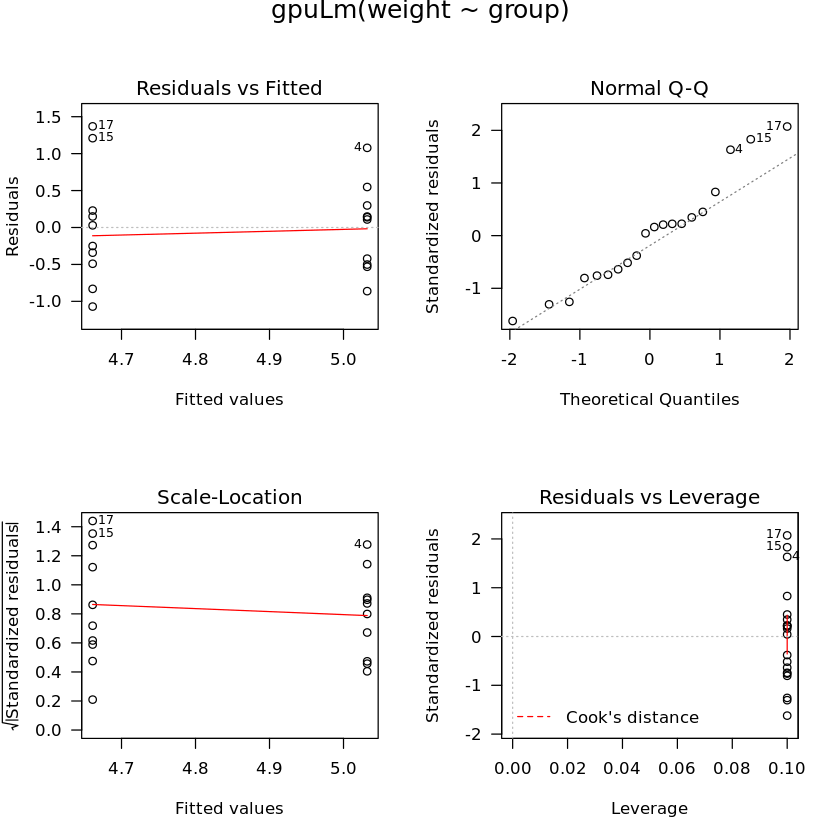

In [10]:
example(gpuLm)

# Multiplicación de matrices:

In [11]:
example(gpuMatMult)


gpMtMl> matA <- matrix(runif(2*3), 2, 3)

gpMtMl> matB <- matrix(runif(3*4), 3, 4)

gpMtMl> gpuMatMult(matA, matB)
          [,1]      [,2]      [,3]      [,4]
[1,] 0.8683682 0.4744960 0.3414757 0.5203934
[2,] 1.3003244 0.9507892 0.5752360 0.7481615


# Descomposición QR

gpuQr: Estimate the QR decomposition for a matrix 

In [12]:
example(gpuQr)


gpuQr> # get some random data of any shape at all
gpuQr> x <- matrix(runif(25), 5, 5)

gpuQr> qr <- gpuQr(x)

gpuQr> print(qr)
$qr
           [,1]       [,2]         [,3]       [,4]        [,5]
[1,] -1.5304995 -1.2065250 -0.925238073 -0.3912009 -0.87395000
[2,]  0.6270961  0.4963311 -0.150561556 -0.1459967 -0.41403899
[3,]  0.3619842  0.4759289 -0.733928323  0.1278784  0.08262265
[4,]  0.2999008 -0.2596580 -0.008250553  0.1527026 -0.28506944
[5,]  0.4230075  0.7577859  0.766588628  0.9999869 -0.02804559
attr(,"Csingle")
[1] TRUE

$pivot
[1] 2 3 4 5 1

$qraux
[1] 1.45479887 1.36308394 1.64208557 1.00511495 0.02804559

$rank
[1] 5

attr(,"class")
[1] "qr"
